In [959]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,cross_validate
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import SGDRegressor, SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,make_scorer,median_absolute_error
from scipy import stats
from sklearn.decomposition import PCA
from IPython.display import display
import ipywidgets as widgets
import xgboost as xgb

#### Carga Data

In [960]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('C:/Users/USER/OneDrive - universidadean.edu.co/3. Machine learning/Proyecto final/datos_granja.csv',sep=";")

print(df)

           Fecha   CO      Ciudad  Temperatura         Depto     Consumo  Unidades  Edad     Sexo TipoGranja   Peso
0     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31   machos     MANUAL  1.718
1     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31  hembras     MANUAL  1.718
2     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31   machos     MANUAL  1.943
3     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31  hembras     MANUAL  1.943
4     17/07/2024  E08     Sasaima           26  Cundinamarca  196.575758    2977.0    32  hembras     MANUAL  1.598
...          ...  ...         ...          ...           ...         ...       ...   ...      ...        ...    ...
1752  17/10/2024  E25    Restrepo           29          Meta  577.322581    7521.0    30   machos     MANUAL  1.817
1753  17/10/2024  E25    Restrepo           29          Meta  577.322581

#### Estadisticas DataSet

In [961]:
# Resumen estadístico de las columnas numéricas
print(df.describe())


       Temperatura       Consumo       Unidades         Edad         Peso
count  1757.000000   1757.000000    1757.000000  1757.000000  1757.000000
mean     25.105293   1012.022232   10074.742266    30.896414     1.735418
std       5.577857   2472.231794    8743.540596     4.896023     0.413089
min      12.000000     -0.736842       6.161000     5.000000     0.155000
25%      23.000000    444.517241    6957.000000    28.000000     1.553000
50%      23.000000    554.451613    7521.000000    31.000000     1.760000
75%      29.000000    714.625000   10686.000000    33.000000     1.929000
max      34.000000  22939.926190  123412.000000    45.000000     7.000000


#### Valores Nulos

In [962]:
# Comprobar valores nulos en cada columna
print(df.isnull().sum())

Fecha          0
CO             0
Ciudad         0
Temperatura    0
Depto          0
Consumo        0
Unidades       0
Edad           0
Sexo           0
TipoGranja     0
Peso           0
dtype: int64


#### Box plot variable numericas

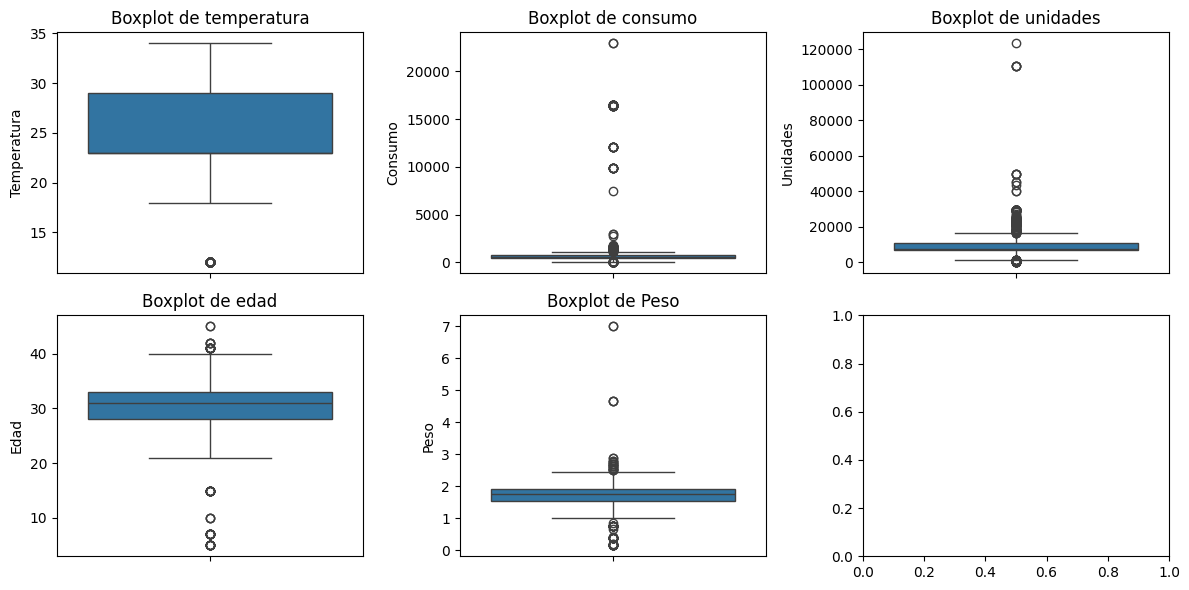

In [963]:

# Crear la figura con subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Ajusta figsize si es necesario

# Primer gráfico: Boxplot de Temperatura
sns.boxplot(ax=axes[0, 0], y=df['Temperatura'])
axes[0, 0].set_title('Boxplot de temperatura')

# Segundo gráfico: Boxplot de Consumo
sns.boxplot(ax=axes[0, 1], y=df['Consumo'])
axes[0, 1].set_title('Boxplot de consumo')

# Tercer gráfico: Boxplot de Unidades
sns.boxplot(ax=axes[0, 2], y=df['Unidades'])
axes[0, 2].set_title('Boxplot de unidades')

# Cuarto gráfico: Boxplot de Edad
sns.boxplot(ax=axes[1, 0], y=df['Edad'])
axes[1, 0].set_title('Boxplot de edad')

# Quinto gráfico: Boxplot de Peso
sns.boxplot(ax=axes[1, 1], y=df['Peso'])
axes[1, 1].set_title('Boxplot de Peso')

# Si hay otro gráfico, por ejemplo, puedes dejar el último espacio vacío o poner un gráfico adicional si es necesario
# axes[1, 2] está vacío en este caso

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


#### Eliminar datos atipicos mediante z-score

In [964]:
columnas = ['Temperatura', 'Consumo', 'Unidades', 'Edad', 'Peso']

# Crear una copia del DataFrame original para almacenar los datos filtrados
df_filtered = df.copy()

# Calcular Z-Score para cada columna y eliminar outliers de manera acumulativa pero correcta
for columna in columnas:
    # Calcular el z-score de cada valor en la columna original
    z_scores = stats.zscore(df_filtered[columna])
    # Filtrar los datos para mantener solo aquellos con un z-score en el rango [-3, 3]
    df_filtered = df_filtered[(z_scores > -3) & (z_scores < 3)]

    # Imprimir cuántos outliers fueron eliminados para esta columna específica
    outliers_count = len(df) - len(df_filtered)
    print(f"Valores atípicos eliminados en la columna {columna}: [{outliers_count} rows]")

# Mostrar el DataFrame resultante sin outliers
print(df_filtered)



Valores atípicos eliminados en la columna Temperatura: [0 rows]
Valores atípicos eliminados en la columna Consumo: [50 rows]
Valores atípicos eliminados en la columna Unidades: [64 rows]
Valores atípicos eliminados en la columna Edad: [105 rows]
Valores atípicos eliminados en la columna Peso: [113 rows]
           Fecha   CO      Ciudad  Temperatura         Depto     Consumo  Unidades  Edad     Sexo TipoGranja   Peso
0     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31   machos     MANUAL  1.718
1     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31  hembras     MANUAL  1.718
2     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31   machos     MANUAL  1.943
3     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31  hembras     MANUAL  1.943
4     17/07/2024  E08     Sasaima           26  Cundinamarca  196.575758    2977.0    32  hembras     MANUAL  1.598

#### Eliminar variables

In [965]:
df_filtered = df_filtered.drop(columns=['Fecha','CO'])

#### Crear data frame para variables independientes y la variable dependiente

In [966]:
# Separar la columna objetivo antes de aplicar el preprocesamiento
df_peso = df_filtered['Peso']
df_filtered_ind = df_filtered.drop(columns=['Peso'])

#### Variables categoricas a binarias

In [967]:
# Seleccionar solo las variables categóricas y todas las columnas
categorical_features = ['Ciudad', 'Depto', 'Sexo', 'TipoGranja']
non_categorical_features = df_filtered.drop(columns=categorical_features).columns

# Crear y aplicar el OneHotEncoder directamente a las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
X_categorical = encoder.fit_transform(df_filtered[categorical_features])

# Crear nombres de columnas para el DataFrame resultante
categorical_column_names = encoder.get_feature_names_out(categorical_features)

# Crear un DataFrame solo con las variables categóricas en formato binario
df_categorical_binary = pd.DataFrame(X_categorical, columns=categorical_column_names, index=df_filtered.index)

# Crear un nuevo DataFrame que incluya todas las columnas excepto las categóricas sin transformar
df_tranform = pd.concat([df_filtered[non_categorical_features], df_categorical_binary], axis=1)

# Ver el nuevo DataFrame con todas las columnas y las categóricas transformadas
print("Nuevo DataFrame con todas las columnas, incluyendo las variables categóricas transformadas:")
print(df_tranform)



Nuevo DataFrame con todas las columnas, incluyendo las variables categóricas transformadas:
      Temperatura     Consumo  Unidades  Edad   Peso  Ciudad_Arbelaez  Ciudad_Cabuyaro  Ciudad_Cumaral  Ciudad_Facatativa  Ciudad_Fusagasuga  Ciudad_Granada  Ciudad_La Mesa  Ciudad_Nilo  Ciudad_Paratebueno  Ciudad_Restrepo  Ciudad_Sasaima  Ciudad_Silvania  Ciudad_Villeta                          Depto_Cundinamarca  Depto_Meta  Sexo_hembras  Sexo_machos  TipoGranja_AUTOMATICA  TipoGranja_MANUAL  TipoGranja_SEMI AUTOMATICA
0              21  695.250000   10057.0    31  1.718              0.0              0.0             0.0                0.0                1.0             0.0             0.0          0.0                 0.0              0.0             0.0              0.0                                     0.0                 1.0         0.0           0.0          1.0                    0.0                1.0                         0.0
1              21  695.250000   10057.0    31  1.718      

#### Correlacion con varios metodos

In [968]:
# 1. Correlación de Pearson
correlacion_pearson = df_tranform.corr(method='pearson')

# 2. Correlación de Spearman
correlacion_spearman = df_tranform.corr(method='spearman')

# 3. Correlación de Kendall
correlacion_kendall = df_tranform.corr(method='kendall')

# Crear un contenedor con desplazamiento
out = widgets.Output(layout={'height': '600px', 'overflow_y': 'scroll', 'border': '1px solid black'})

# Dibujar dentro del contenedor de desplazamiento
with out:
    plt.figure(figsize=(20, 40))

    # 1. Correlación de Pearson
    plt.subplot(3, 1, 1)
    sns.heatmap(correlacion_pearson, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Pearson')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # 2. Correlación de Spearman
    plt.subplot(3, 1, 2)
    sns.heatmap(correlacion_spearman, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Spearman')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # 3. Correlación de Kendall
    plt.subplot(3, 1, 3)
    sns.heatmap(correlacion_kendall, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Kendall')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste para título principal
    plt.show()

# Mostrar el contenedor con la barra de desplazamiento
display(out)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [969]:
correlation_with_peso_pearson = correlacion_pearson['Peso'].sort_values()
correlation_with_peso_spearman = correlacion_spearman['Peso'].sort_values()
correlation_with_peso_kendall = correlacion_kendall['Peso'].sort_values()

# Crear un contenedor con desplazamiento
out = widgets.Output(layout={'height': '600px', 'overflow_y': 'scroll', 'border': '1px solid black'})

# Dibujar dentro del contenedor de desplazamiento
with out:
    plt.figure(figsize=(10, 18))  # Aumentar el tamaño para tener más espacio para cada gráfico

    # Gráfico de Pearson
    plt.subplot(3, 1, 1)
    correlation_with_peso_pearson.plot(kind='barh', color='skyblue')
    plt.title('Correlación de Variables con Peso (Pearson)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_pearson):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

    # Gráfico de Spearman
    plt.subplot(3, 1, 2)
    correlation_with_peso_spearman.plot(kind='barh', color='salmon')
    plt.title('Correlación de Variables con Peso (Spearman)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_spearman):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

    # Gráfico de Kendall
    plt.subplot(3, 1, 3)
    correlation_with_peso_kendall.plot(kind='barh', color='lightgreen')
    plt.title('Correlación de Variables con Peso (Kendall)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_kendall):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)
    
    # Ajustar el espaciado entre los subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=3)

    # Mostrar las gráficas
    plt.show()

# Mostrar el contenedor con la barra de desplazamiento
display(out)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

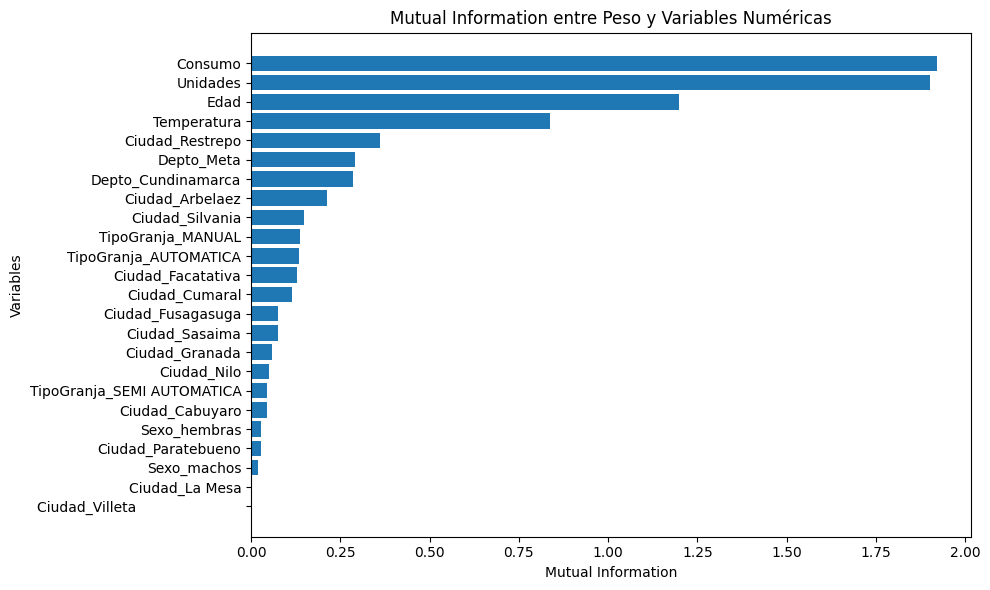

In [970]:
# Filtrar solo las columnas numéricas y excluir 'Peso'
numeric_columns = df_tranform.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Peso')

# Calcular la información mutua entre 'Peso' y cada variable numérica
mutual_info_results = {}
for column in numeric_columns:
    mutual_info = mutual_info_regression(df_tranform[[column]], df_tranform['Peso'])
    mutual_info_results[column] = mutual_info[0]

# Identificar las columnas con información mutua menor a 0.1
columns_to_exclude = [col for col, mi in mutual_info_results.items() if mi < 0.1]

# Ordenar y graficar resultados de mayor a menor información mutua
sorted_mutual_info = dict(sorted(mutual_info_results.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_mutual_info.keys()), list(sorted_mutual_info.values()))
plt.xlabel("Mutual Information")
plt.ylabel("Variables")
plt.title("Mutual Information entre Peso y Variables Numéricas")
plt.gca().invert_yaxis()  # Invertir el eje y para ver las variables con mayor MI arriba
plt.tight_layout()
plt.show()


#### Separar variable objetivo de las variables dependientes

In [971]:
# Crear el DataFrame de entrenamiento excluyendo las columnas con baja información mutua y la variable objetivo
df_tranform_ind = df_tranform.drop(columns=columns_to_exclude + ['Peso'])
df_peso = df_tranform['Peso']  # Variable objetivo

#### Normalizar variables independientes numericas

In [972]:
# Dividir las columnas por tipo
numeric_features = ['Temperatura', 'Consumo', 'Unidades', 'Edad']  # Columnas numéricas a escalar

scaler = StandardScaler()
df_tranform_ind[numeric_features] = scaler.fit_transform(df_tranform_ind[numeric_features])

# Ahora el DataFrame `df` tiene solo las columnas numéricas escaladas
print(df_tranform_ind)


      Temperatura   Consumo  Unidades      Edad  Ciudad_Arbelaez  Ciudad_Cumaral  Ciudad_Facatativa  Ciudad_Restrepo  Ciudad_Silvania  Depto_Cundinamarca  Depto_Meta  TipoGranja_AUTOMATICA  TipoGranja_MANUAL
0       -0.743626  0.213823  0.214126 -0.142281              0.0             0.0                0.0              0.0              0.0                 1.0         0.0                    0.0                1.0
1       -0.743626  0.213823  0.214126 -0.142281              0.0             0.0                0.0              0.0              0.0                 1.0         0.0                    0.0                1.0
2       -0.743626  0.165111 -0.306282 -0.142281              0.0             0.0                0.0              0.0              0.0                 1.0         0.0                    0.0                1.0
3       -0.743626  0.165111 -0.306282 -0.142281              0.0             0.0                0.0              0.0              0.0                 1.0         0.0   

#### Implementación XGBoost

In [973]:
# Definición del modelo y datos, basados en el contexto del usuario
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Función para calcular R2 ajustado
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(df_tranform_ind, df_peso, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Cálculo de métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
medae_train = median_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
r2_adjusted_train = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])

# Cálculo de métricas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
medae_test = median_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
r2_adjusted_test = adjusted_r2(r2_test, X_test.shape[0], X_test.shape[1])

# Resultados
metrics = {
    "Conjunto de Entrenamiento": {
        "MSE": mse_train,
        "RMSE": rmse_train,
        "MAE": mae_train,
        "MedAE": medae_train,
        "MAPE": mape_train,
        "R2": r2_train,
        "R2 Ajustado": r2_adjusted_train
    },
    "Conjunto de Prueba": {
        "MSE": mse_test,
        "RMSE": rmse_test,
        "MAE": mae_test,
        "MedAE": medae_test,
        "MAPE": mape_test,
        "R2": r2_test,
        "R2 Ajustado": r2_adjusted_test
    }
}

metrics

{'Conjunto de Entrenamiento': {'MSE': np.float64(0.0019388990571298293),
  'RMSE': np.float64(0.044032931507336975),
  'MAE': np.float64(0.032309424191826655),
  'MedAE': np.float64(0.02406182765960696),
  'MAPE': np.float64(1.859452850051093),
  'R2': 0.9753168370470613,
  'R2 Ajustado': 0.9750701951420742},
 'Conjunto de Prueba': {'MSE': np.float64(0.005526564868748964),
  'RMSE': np.float64(0.07434086943767179),
  'MAE': np.float64(0.05129321176302832),
  'MedAE': np.float64(0.03340666675567627),
  'MAPE': np.float64(3.022136093090699),
  'R2': 0.933415087005625,
  'R2 Ajustado': 0.9306671382153809}}

#### Evaluar metricas por cantidad de folds

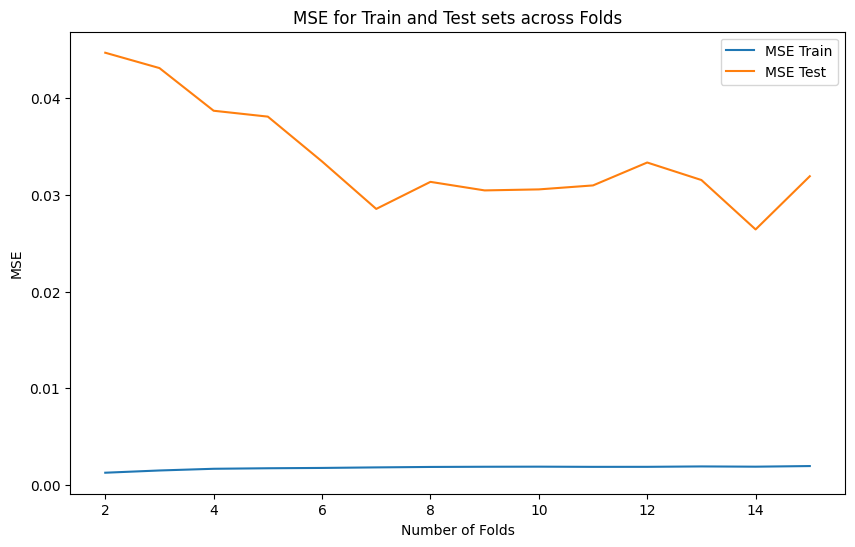

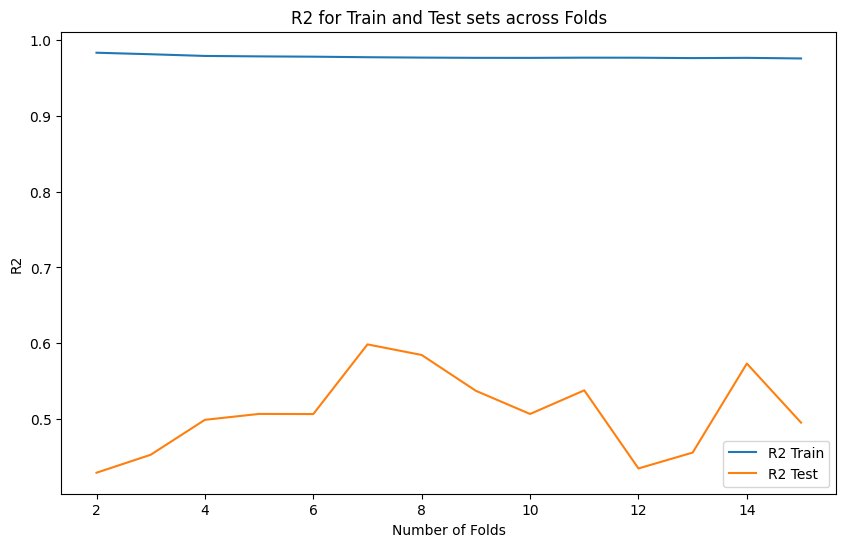

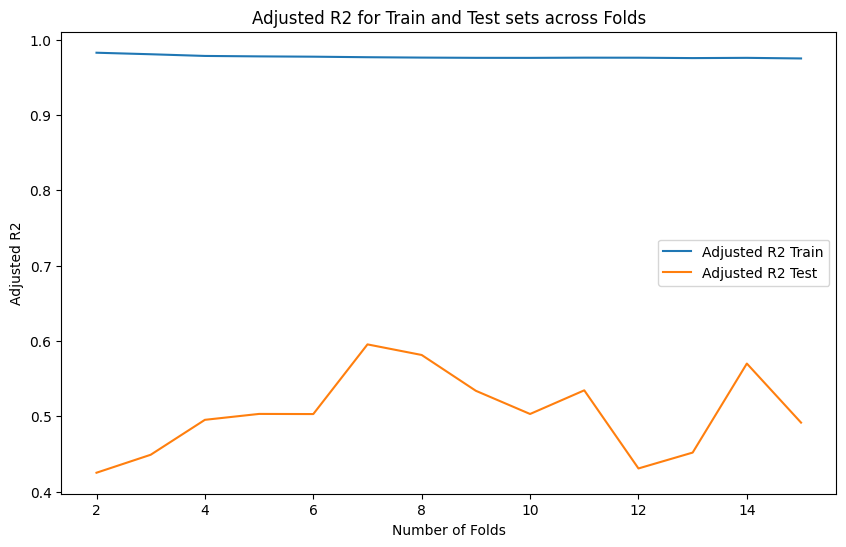

In [974]:
# Modelo
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Variables para almacenar las métricas
folds_range = range(2, 16)
mse_train = []
mse_test = []
r2_train = []
r2_test = []
adjusted_r2_train = []
adjusted_r2_test = []

# Loop para evaluar de 2 a 15 particiones
for folds in folds_range:
    # Calcular métricas utilizando cross_validate
    scores = cross_validate(
        model, df_tranform_ind, df_peso, cv=folds,
        scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False),
                 'r2': make_scorer(r2_score)},
        return_train_score=True
    )
    
    # Calcular MSE en entrenamiento y prueba
    mse_train.append(-np.mean(scores['train_mse']))
    mse_test.append(-np.mean(scores['test_mse']))
    
    # Calcular R2 en entrenamiento y prueba
    r2_train.append(np.mean(scores['train_r2']))
    r2_test.append(np.mean(scores['test_r2']))
    
    # Calcular R2 ajustado en entrenamiento y prueba
    n = len(df_peso)  # Número total de muestras
    k = df_tranform_ind.shape[1]  # Número de variables independientes
    adj_r2_train = 1 - (1 - np.mean(scores['train_r2'])) * (n - 1) / (n - k - 1)
    adj_r2_test = 1 - (1 - np.mean(scores['test_r2'])) * (n - 1) / (n - k - 1)
    
    adjusted_r2_train.append(adj_r2_train)
    adjusted_r2_test.append(adj_r2_test)

# Graficar MSE
plt.figure(figsize=(10, 6))
plt.plot(folds_range, mse_train, label="MSE Train")
plt.plot(folds_range, mse_test, label="MSE Test")
plt.xlabel("Number of Folds")
plt.ylabel("MSE")
plt.title("MSE for Train and Test sets across Folds")
plt.legend()
plt.show()

# Graficar R2
plt.figure(figsize=(10, 6))
plt.plot(folds_range, r2_train, label="R2 Train")
plt.plot(folds_range, r2_test, label="R2 Test")
plt.xlabel("Number of Folds")
plt.ylabel("R2")
plt.title("R2 for Train and Test sets across Folds")
plt.legend()
plt.show()

# Graficar R2 Ajustado
plt.figure(figsize=(10, 6))
plt.plot(folds_range, adjusted_r2_train, label="Adjusted R2 Train")
plt.plot(folds_range, adjusted_r2_test, label="Adjusted R2 Test")
plt.xlabel("Number of Folds")
plt.ylabel("Adjusted R2")
plt.title("Adjusted R2 for Train and Test sets across Folds")
plt.legend()
plt.show()


#### Evaluar metricas en cada fold

Dado que en el anterior ejercicio los mejores resultados se encontraron realizando un validacion cruzada con 7 particiones, se toma esta cantidad para evluar las metricas en cada una de las 7 particiones elegidas

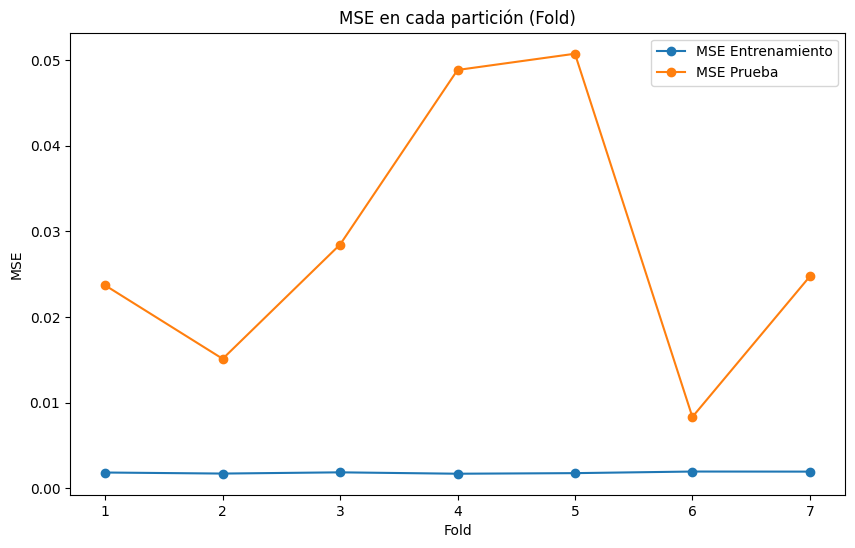

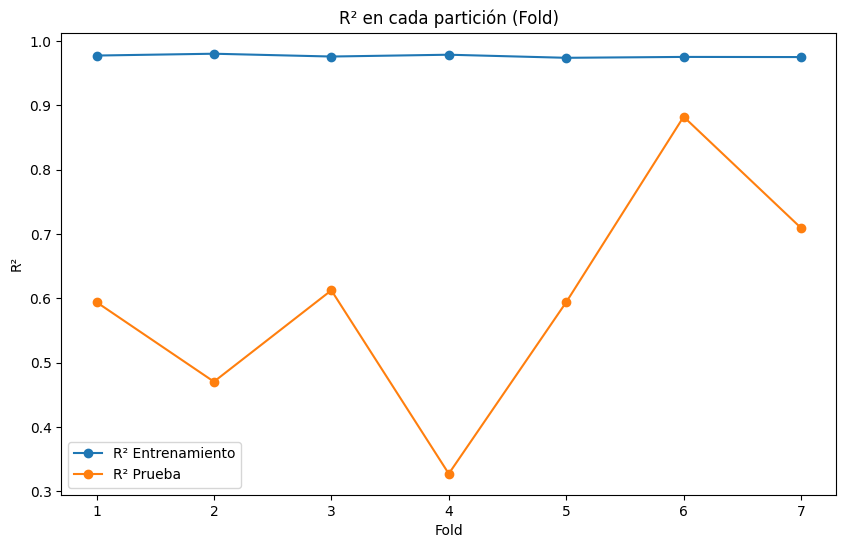

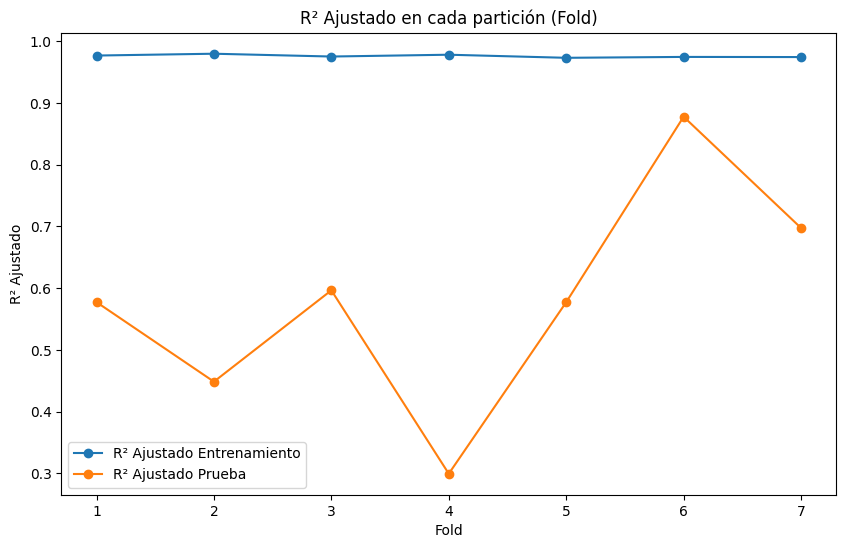

In [975]:
# Número de características (para el cálculo de R² ajustado)
p = df_tranform_ind.shape[1]

# Crear un diccionario de los scorers
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Realizar validación cruzada
cv_results = cross_validate(model, df_tranform_ind, df_peso, cv=7, scoring=scoring, return_train_score=True)

# Extraer métricas de entrenamiento y prueba
mse_train_list = cv_results['train_mse']
mse_test_list = cv_results['test_mse']
r2_train_list = cv_results['train_r2']
r2_test_list = cv_results['test_r2']

# Calcular R² ajustado manualmente
n_train = df_tranform_ind.shape[0] / 5  # Aproximado para cada fold
r2_adj_train_list = [1 - (1 - r2) * ((n_train - 1) / (n_train - p - 1)) for r2 in r2_train_list]
r2_adj_test_list = [1 - (1 - r2) * ((n_train - 1) / (n_train - p - 1)) for r2 in r2_test_list]

# Gráficas de MSE, R² y R² ajustado
folds = range(1, len(mse_train_list) + 1)

# Gráfico de MSE
plt.figure(figsize=(10, 6))
plt.plot(folds, mse_train_list, label='MSE Entrenamiento', marker='o')
plt.plot(folds, mse_test_list, label='MSE Prueba', marker='o')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE en cada partición (Fold)')
plt.legend()
plt.show()

# Gráfico de R²
plt.figure(figsize=(10, 6))
plt.plot(folds, r2_train_list, label='R² Entrenamiento', marker='o')
plt.plot(folds, r2_test_list, label='R² Prueba', marker='o')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.title('R² en cada partición (Fold)')
plt.legend()
plt.show()

# Gráfico de R² Ajustado
plt.figure(figsize=(10, 6))
plt.plot(folds, r2_adj_train_list, label='R² Ajustado Entrenamiento', marker='o')
plt.plot(folds, r2_adj_test_list, label='R² Ajustado Prueba', marker='o')
plt.xlabel('Fold')
plt.ylabel('R² Ajustado')
plt.title('R² Ajustado en cada partición (Fold)')
plt.legend()
plt.show()

Se presenta un claro overfitting aspecto que no se visulizó al hacer un split de 80/20 

#### Variables con mayor importancia para XGBoost de regresion

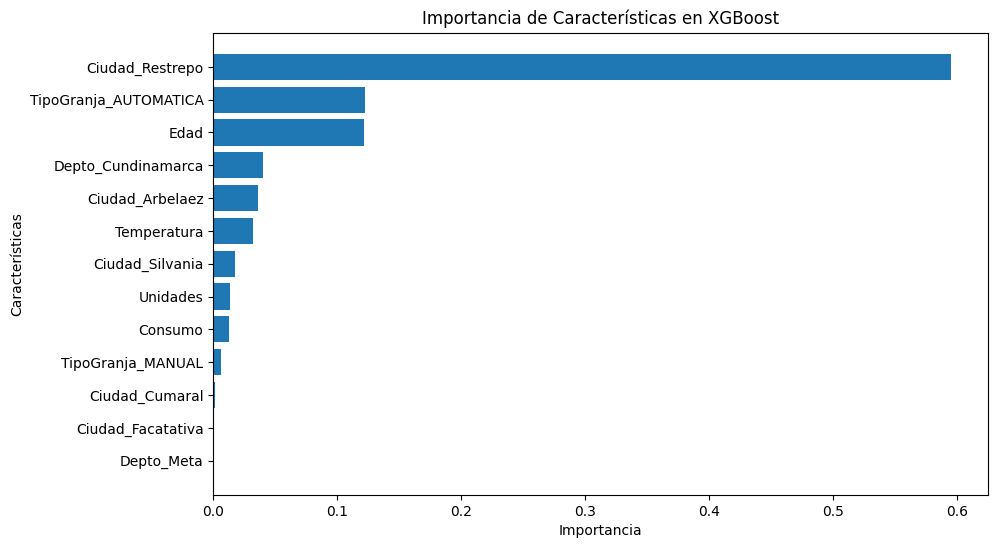

In [976]:
# Entrenar el modelo (ajusta con tus datos de entrenamiento)
model.fit(df_tranform_ind, df_peso)  # Asegúrate de que df_transform_ind y df_peso sean tus datos de entrenamiento

# Obtener los pesos de las características
feature_importance = model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({
    'Característica': df_tranform_ind.columns,
    'Importancia': feature_importance
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características en XGBoost')
plt.gca().invert_yaxis()
plt.show()

#### PCA
Reducir la dimensionalidad del DataSet con la finalidad del reducuir el overfitting

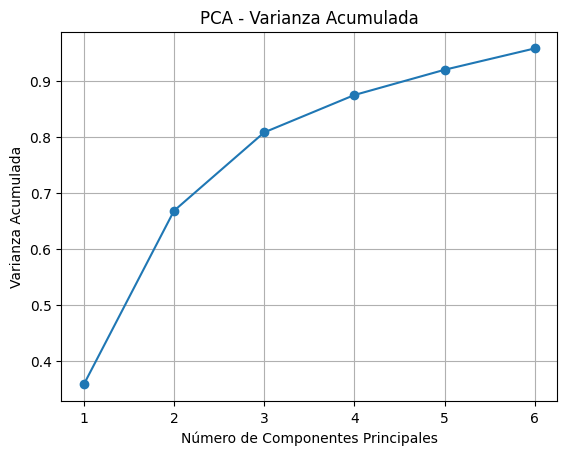

In [977]:
# Aplicar PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(df_tranform_ind)

# Grafico actualizado de varianza acumulada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('PCA - Varianza Acumulada')
plt.grid(True)
plt.show()



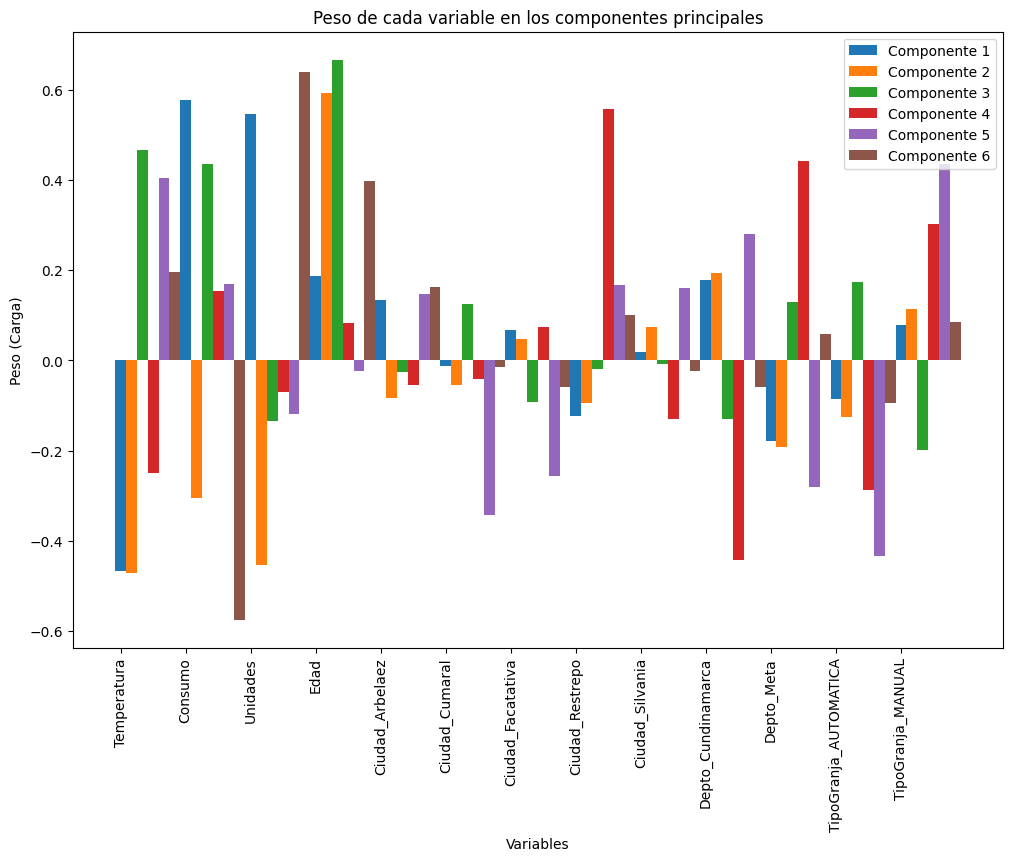

In [978]:
# Extraemos las cargas de los componentes principales
loadings = pca.components_.T
num_components = loadings.shape[1]
variables = df_tranform_ind.columns

# Graficamos el peso de cada variable por componente
plt.figure(figsize=(12, 8))

for i in range(num_components):
    plt.bar(np.arange(len(variables)) + i / num_components, loadings[:, i], width=1 / num_components, label=f'Componente {i + 1}')

plt.xticks(ticks=np.arange(len(variables)), labels=variables, rotation=90)
plt.xlabel('Variables')
plt.ylabel('Peso (Carga)')
plt.title('Peso de cada variable en los componentes principales')
plt.legend()
plt.show()


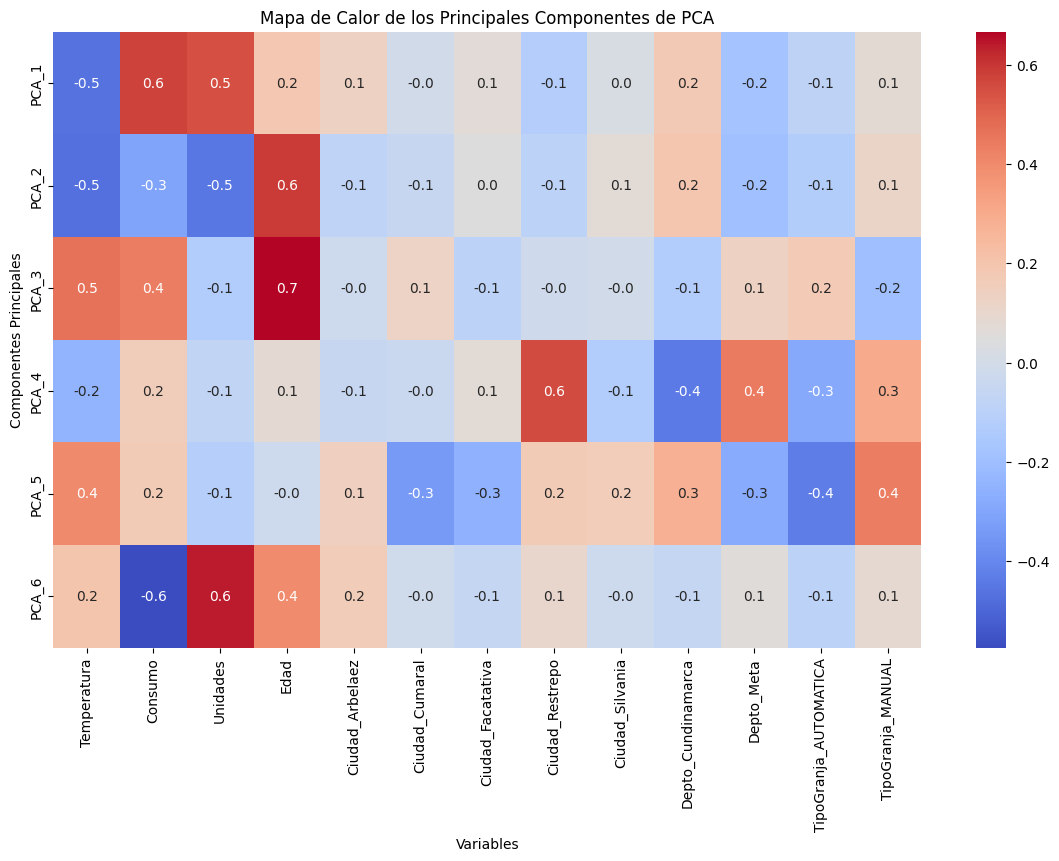

In [979]:
pca_data = pca.fit_transform(df_tranform_ind)

# Selecciona las primeras componentes principales
num_components = min(12, pca.components_.shape[0])  # Máximo 12 o el total de componentes retenidos
componentes_principales = pca.components_[:num_components]

# Crea un DataFrame para el mapa de calor
heatmap_data = pd.DataFrame(componentes_principales, columns=df_tranform_ind.columns, 
                            index=[f'PCA_{i+1}' for i in range(num_components)])

# Grafica el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')
plt.title('Mapa de Calor de los Principales Componentes de PCA')
plt.show()

In [980]:
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6
0     0.717597  0.296511 -0.528167 -0.103004  0.026627 -0.227248
1     0.717597  0.296511 -0.528167 -0.103004  0.026627 -0.227248
2     0.404734  0.547101 -0.480040 -0.073650  0.079945 -0.532349
3     0.404734  0.547101 -0.480040 -0.073650  0.079945 -0.532349
4    -1.129570  1.062792 -0.316907 -0.407777  0.311603 -0.035206
...        ...       ...       ...       ...       ...       ...
1639 -0.915557 -0.708756  0.103879  0.946938  0.216592  0.023476
1640 -0.915557 -0.708756  0.103879  0.946938  0.216592  0.023476
1641 -0.915557 -0.708756  0.103879  0.946938  0.216592  0.023476
1642 -0.915557 -0.708756  0.103879  0.946938  0.216592  0.023476
1643 -0.915557 -0.708756  0.103879  0.946938  0.216592  0.023476

[1644 rows x 6 columns]


#### Predeccion del modelo con varios tipos de regresion

In [981]:

# Lista de modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.5,
        max_depth=4,
        random_state=42,
        alpha=1.5
    ),
}

# Configuración de KFold
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Función para calcular R² ajustado
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Métricas personalizadas
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score),
}

# Número de muestras y características
n_samples, n_features = pca_df.shape

# Evaluación de modelos
for name, model in models.items():
    print(f"\nEvaluando {name}")
    
    results = cross_validate(
        model, 
        pca_df, 
        df_peso, 
        cv=kf, 
        scoring=scoring, 
        return_train_score=True
    )
    
    # Cálculo de R² ajustado para cada división
    train_r2_adj = [adjusted_r2(r2, n_samples, n_features) for r2 in results['train_R2']]
    test_r2_adj = [adjusted_r2(r2, n_samples, n_features) for r2 in results['test_R2']]
    
    # Mostrar resultados promedio
    print("Métricas de prueba")
    print(f"MAE: {np.mean(results['test_MAE'])}")
    print(f"MSE: {np.mean(results['test_MSE'])}")
    print(f"R2: {np.mean(results['test_R2'])}")
    print(f"R2 Ajustado: {np.mean(test_r2_adj)}")
    
    print("\nMétricas de entrenamiento")
    print(f"MAE: {np.mean(results['train_MAE'])}")
    print(f"MSE: {np.mean(results['train_MSE'])}")
    print(f"R2: {np.mean(results['train_R2'])}")
    print(f"R2 Ajustado: {np.mean(train_r2_adj)}")




Evaluando Linear Regression
Métricas de prueba
MAE: 0.12990535191616584
MSE: 0.03418972414655101
R2: 0.5687573128993453
R2 Ajustado: 0.5671767043943948

Métricas de entrenamiento
MAE: 0.12877633400578878
MSE: 0.03312826463972553
R2: 0.5842153681856798
R2 Ajustado: 0.5826914171833061

Evaluando Random Forest
Métricas de prueba
MAE: 0.052820729476219054
MSE: 0.008249991444612567
R2: 0.8969407099207088
R2 Ajustado: 0.8965629727548715

Métricas de entrenamiento
MAE: 0.027897815678242267
MSE: 0.0018305356948005707
R2: 0.9770216436766991
R2 Ajustado: 0.9769374224562105

Evaluando XGBoost
Métricas de prueba
MAE: 0.07099962201497159
MSE: 0.010810646854863284
R2: 0.864259658589628
R2 Ajustado: 0.8637621374848863

Métricas de entrenamiento
MAE: 0.057280172966071734
MSE: 0.0061801378063708725
R2: 0.9224224924023214
R2 Ajustado: 0.922138152117907


#### Graficar metricas con XGBoost para cada partición

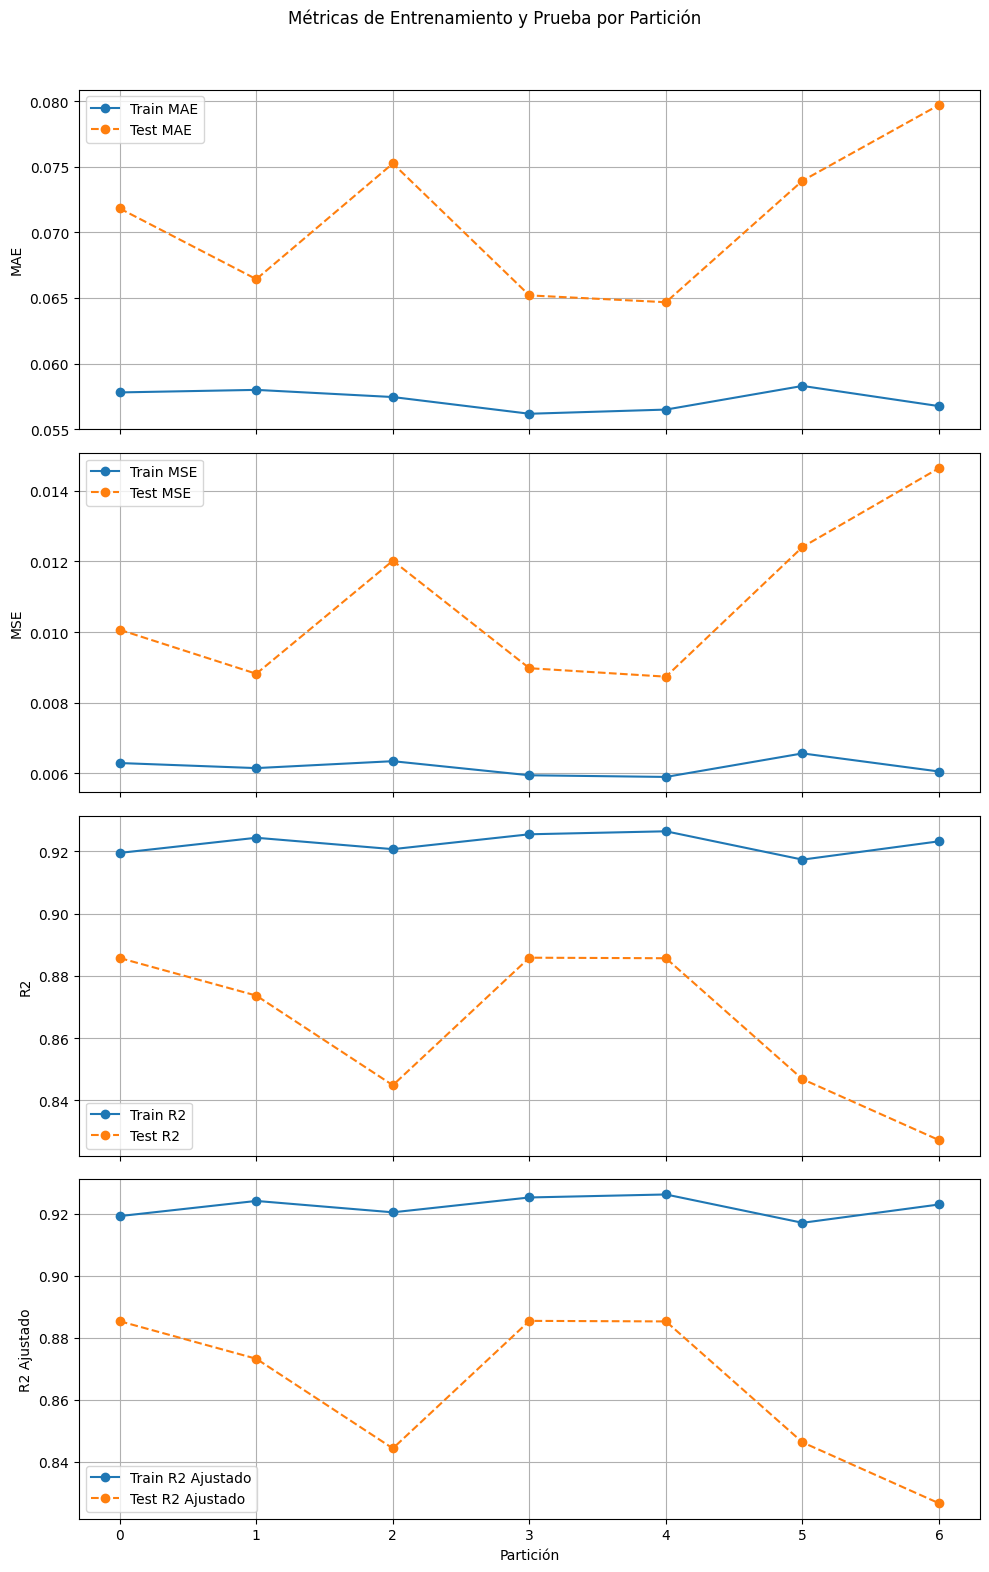

In [982]:
# Graficar las métricas de entrenamiento y prueba en la misma gráfica para cada partición
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
fig.suptitle("Métricas de Entrenamiento y Prueba por Partición")

# Graficar MAE
axes[0].plot(results['train_MAE'], marker='o', linestyle='-', label='Train MAE')
axes[0].plot(results['test_MAE'], marker='o', linestyle='--', label='Test MAE')
axes[0].set_ylabel("MAE")
axes[0].legend()
axes[0].grid(True)

# Graficar MSE
axes[1].plot(results['train_MSE'], marker='o', linestyle='-', label='Train MSE')
axes[1].plot(results['test_MSE'], marker='o', linestyle='--', label='Test MSE')
axes[1].set_ylabel("MSE")
axes[1].legend()
axes[1].grid(True)

# Graficar R2
axes[2].plot(results['train_R2'], marker='o', linestyle='-', label='Train R2')
axes[2].plot(results['test_R2'], marker='o', linestyle='--', label='Test R2')
axes[2].set_ylabel("R2")
axes[2].legend()
axes[2].grid(True)

# Graficar R2 ajustado
axes[3].plot(train_r2_adj, marker='o', linestyle='-', label='Train R2 Ajustado')
axes[3].plot(test_r2_adj, marker='o', linestyle='--', label='Test R2 Ajustado')
axes[3].set_ylabel("R2 Ajustado")
axes[3].legend()
axes[3].grid(True)

axes[-1].set_xlabel("Partición")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()